Карпеченко Д.М., dz16, v.0.1, 29.11.2022

In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split

#Снять ограничения на вывод колонок
pd.set_option('display.max_columns', None)
#Снять ограничения на вывод строк
pd.set_option('display.max_rows', 15)

# Получение данных

Выведим данные в сетке 4*3.
Также разобьем наши данные таким образом, чтобы в переменной X оказался массив наблюдений, содержащий 1797 × 64 числа, а в переменной y – массив истинных меток классов, содержащий 1797 чисел.

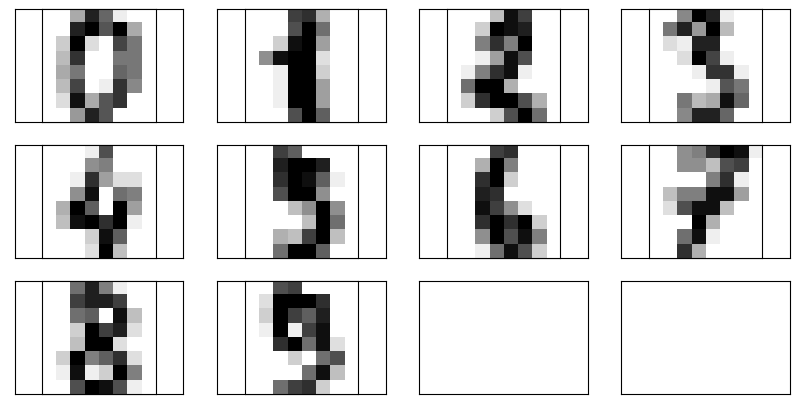

In [314]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(3, 4, figsize=(10, 5),
                            subplot_kw={'xticks':(), 'yticks': ()})
plt.gray()
for i in range(10):
    ax = fig.add_subplot(3, 4, i+1 , xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary, interpolation='nearest')


In [315]:
X = digits.data
Y = digits.target

In [316]:
Y.shape , X.shape

((1797,), (1797, 64))

# Кластеризация и оценка качества

Используем метод K-средних (K-means clustering)

In [317]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
y_kmeans=kmeans.fit_predict(X)


In [318]:
y_kmeans.shape

(1797,)

In [319]:
from scipy.stats import mode

labels = np.zeros_like(y_kmeans)
for i in range(10):
    mask = (y_kmeans == i)
    labels[mask] = mode(Y[mask], keepdims=True)[0]

Визуализируем центры полученных кластеров

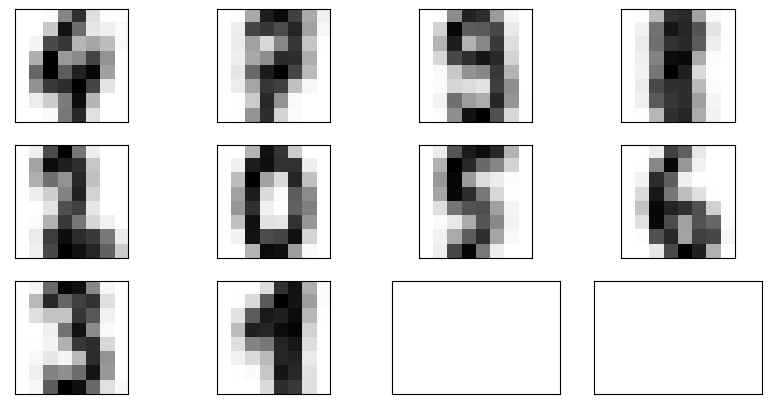

In [320]:
fig, ax = plt.subplots(3, 4, figsize=(10, 5),subplot_kw={'xticks':(), 'yticks': ()})
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Используем иерархическую кластеризацию (AgglomerativeClustering)

In [321]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=10,linkage='single')
y_pred = agg.fit_predict(X)

Визуализация центров кластеров

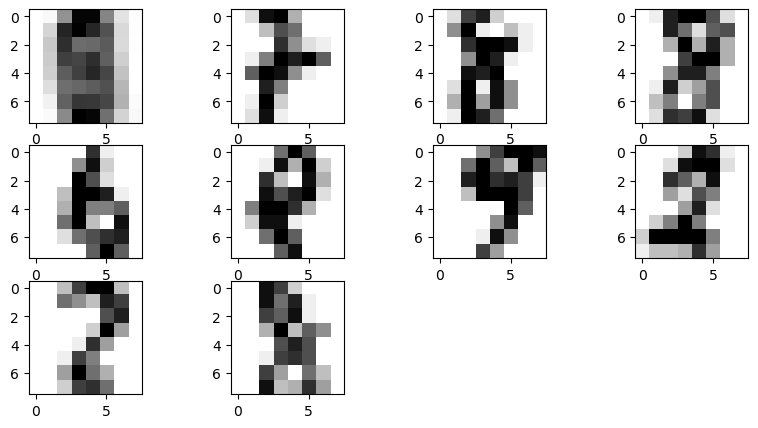

In [322]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(np.mean(X[y_pred==i],axis=0).reshape(8,8), cmap=plt.cm.binary)

Вывод: наблюдаем, что при использовании метода К-средних, полученные центры кластеров более похожи на адекватное написание цифр, чем у полученной иерархическим методом

# Определение метрик silhouette_score, v_measure_score

In [323]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [324]:
y_kmeans

array([5, 3, 3, ..., 3, 2, 2])

In [325]:
X_scaled

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

Подсчитаем наши метрики для количества кластеров от 2 до 20. Считаем метрики сразу для двух моделей. Для к-средних silhouette_score, v_measure_score и 

In [326]:
from sklearn.metrics import silhouette_score, v_measure_score
km_scores= []
k_inertia = []
km_silhouette = []
vmeasure_score =[]

km_silhouette_agg = []
vmeasure_score_agg =[]
for i in range(2,21):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    agg = AgglomerativeClustering(n_clusters=i,linkage='single')
    y_pred = agg.fit_predict(X_scaled)

    k_inertia.append(km.inertia_)
    print("Score for number of cluster(s) KMeans {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) KMeans {}: {}".format(i,silhouette))
    
    v_measure = v_measure_score(Y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) KMeans {}: {}".format(i,v_measure))
    print("-"*100)
    
    silhouette_agg = silhouette_score(X_scaled,y_pred)
    km_silhouette_agg.append(silhouette_agg)
    print("Silhouette score for number of cluster(s) AgglomerativeClustering {}: {}".format(i,silhouette))
    
    v_measure_agg = v_measure_score(Y,y_pred)
    vmeasure_score_agg.append(v_measure_agg)
    print("V-measure score for number of cluster(s) AgglomerativeClustering {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) KMeans 2: -7596.204827677879
Silhouette score for number of cluster(s) KMeans 2: 0.11943210390295136
V-measure score for number of cluster(s) KMeans 2: 0.36504350590728013
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) AgglomerativeClustering 2: 0.11943210390295136
V-measure score for number of cluster(s) AgglomerativeClustering 2: 0.36504350590728013
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) KMeans 3: -6876.977422483127
Silhouette score for number of cluster(s) KMeans 3: 0.1253785131001605
V-measure score for number of cluster(s) KMeans 3: 0.4251829254592324
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) AgglomerativeClustering 3: 0.1253785131001605
V-measure score for number o

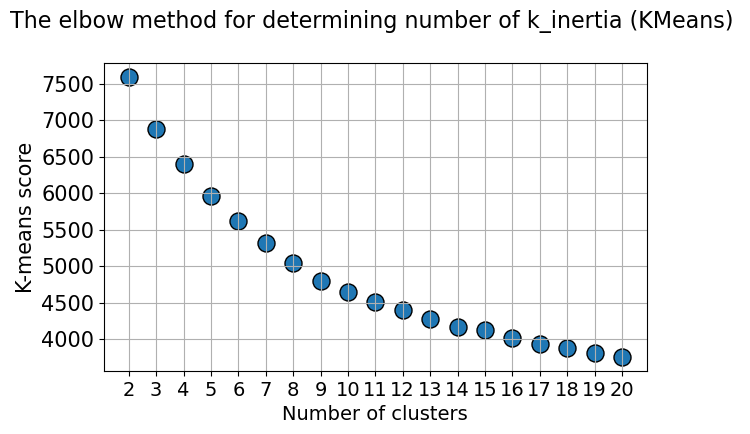

In [327]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of k_inertia (KMeans) \n",fontsize=16)
plt.scatter(x=[i for i in range(2,21)],y=k_inertia,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

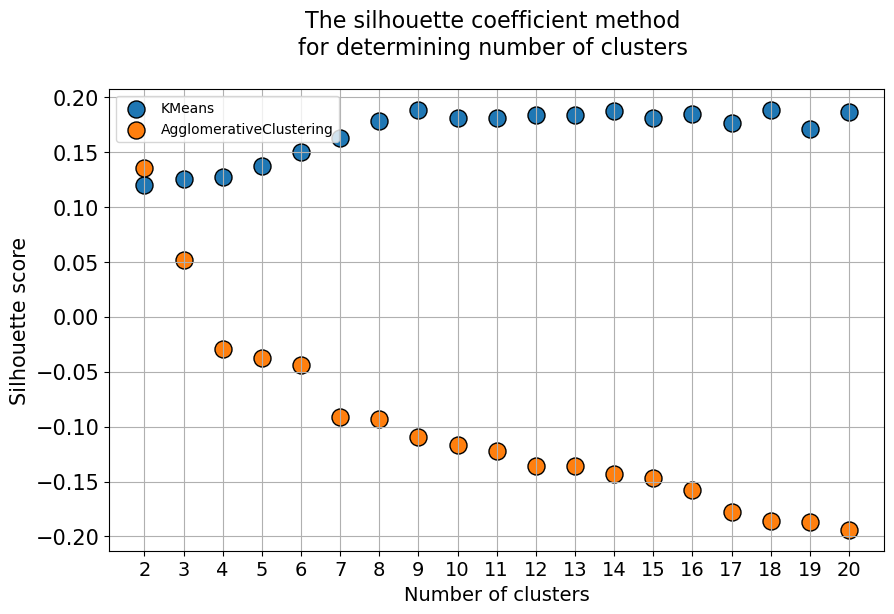

In [328]:
plt.figure(figsize=(10,6))
plt.title("The silhouette coefficient method \nfor determining number of clusters \n",fontsize=16)
plt.scatter(x=[i for i in range(2,21)],y=km_silhouette,s=150,edgecolor='k', label='KMeans')
plt.scatter(x=[i for i in range(2,21)],y=km_silhouette_agg,s=150,edgecolor='k', label='AgglomerativeClustering')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

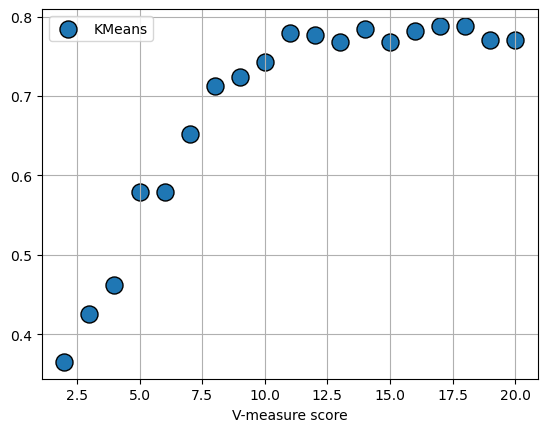

In [329]:
plt.scatter(x=[i for i in range(2,21)],y=vmeasure_score,s=150,edgecolor='k', label='KMeans')
plt.grid(True)
plt.xlabel("V-measure score")
plt.legend()
plt.show()

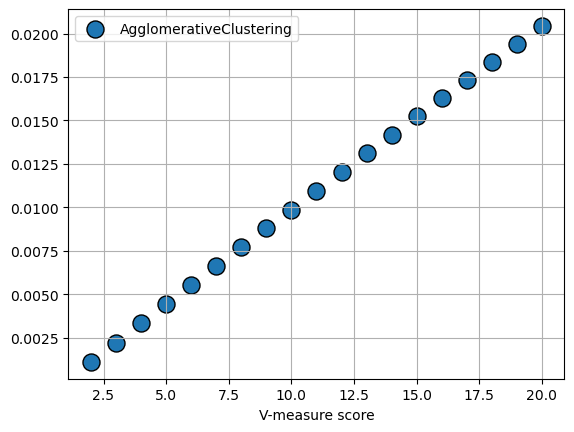

In [330]:
plt.scatter(x=[i for i in range(2,21)],y=vmeasure_score_agg,s=150,edgecolor='k',label='AgglomerativeClustering')
plt.grid(True)
plt.xlabel("V-measure score")
plt.legend()
plt.show()

По скору и силуэту у к-среднего можно предположить, что наилучшее число кластеров 9-10, по v мере сложно че т сказать. Для иерархической модели вообще ничего непонятно

# Снижение размерности признакового пространства

In [331]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
X_1=svd.fit_transform(X_scaled)

In [332]:
km_scores= []
k_inertia = []
km_silhouette = []
vmeasure_score =[]

km_silhouette_agg = []
vmeasure_score_agg =[]
for i in range(2,21):
    km = KMeans(n_clusters=i, random_state=0).fit(X_1)
    preds = km.predict(X_1)
    
    agg = AgglomerativeClustering(n_clusters=i,linkage='single')
    y_pred = agg.fit_predict(X_1)

    k_inertia.append(km.inertia_)
    print("Score for number of cluster(s) KMeans {}: {}".format(i,km.score(X_1)))
    km_scores.append(-km.score(X_1))
    
    silhouette = silhouette_score(X_1,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) KMeans {}: {}".format(i,silhouette))
    
    v_measure = v_measure_score(Y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) KMeans {}: {}".format(i,v_measure))
    print("-"*100)
    
    silhouette_agg = silhouette_score(X_1,y_pred)
    km_silhouette_agg.append(silhouette_agg)
    print("Silhouette score for number of cluster(s) AgglomerativeClustering {}: {}".format(i,silhouette))
    
    v_measure_agg = v_measure_score(Y,y_pred)
    vmeasure_score_agg.append(v_measure_agg)
    print("V-measure score for number of cluster(s) AgglomerativeClustering {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) KMeans 2: -664.0766600731349
Silhouette score for number of cluster(s) KMeans 2: 0.45022512268633413
V-measure score for number of cluster(s) KMeans 2: 0.21798518877212097
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) AgglomerativeClustering 2: 0.45022512268633413
V-measure score for number of cluster(s) AgglomerativeClustering 2: 0.21798518877212097
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) KMeans 3: -420.4438991119888
Silhouette score for number of cluster(s) KMeans 3: 0.4096862871984554
V-measure score for number of cluster(s) KMeans 3: 0.380570689044536
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) AgglomerativeClustering 3: 0.4096862871984554
V-measure score for number of

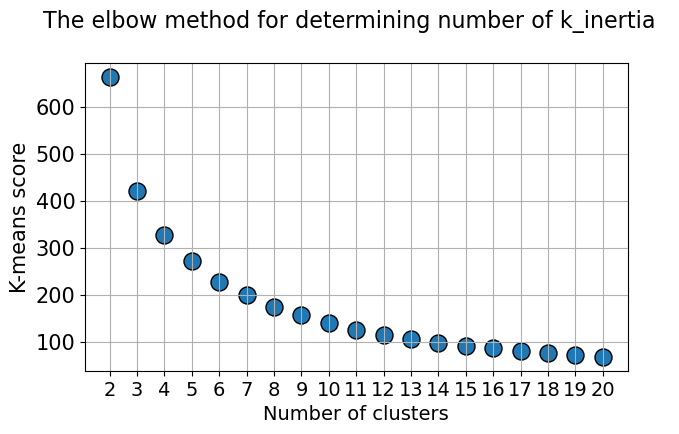

In [333]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of k_inertia  \n",fontsize=16)
plt.scatter(x=[i for i in range(2,21)],y=k_inertia,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

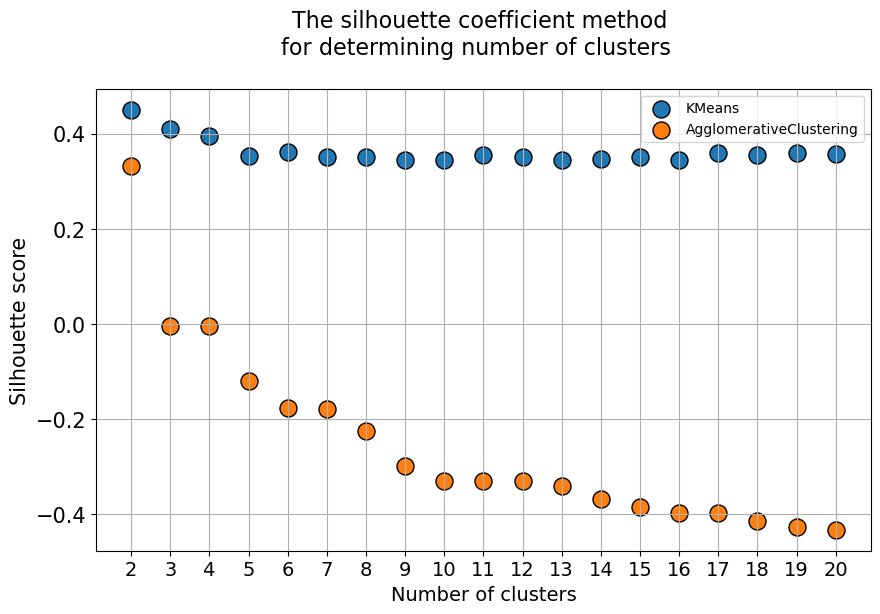

In [334]:
plt.figure(figsize=(10,6))
plt.title("The silhouette coefficient method \nfor determining number of clusters  \n",fontsize=16)
plt.scatter(x=[i for i in range(2,21)],y=km_silhouette,s=150,edgecolor='k', label='KMeans')
plt.scatter(x=[i for i in range(2,21)],y=km_silhouette_agg,s=150,edgecolor='k', label='AgglomerativeClustering')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

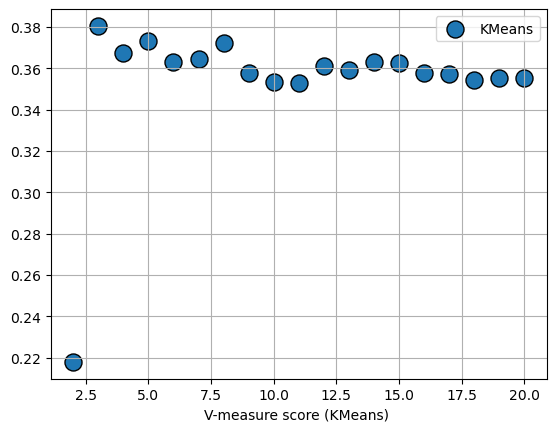

In [335]:
plt.scatter(x=[i for i in range(2,21)],y=vmeasure_score,s=150,edgecolor='k', label='KMeans')
plt.grid(True)
plt.xlabel("V-measure score (KMeans) ")
plt.legend()
plt.show()

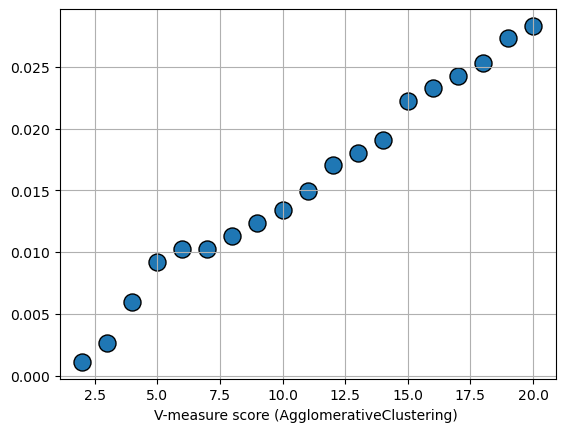

In [336]:
plt.scatter(x=[i for i in range(2,21)],y=vmeasure_score_agg,s=150,edgecolor='k',label='AgglomerativeClustering')
plt.grid(True)
plt.xlabel("V-measure score (AgglomerativeClustering) ")
plt.show()

Силуэт и v мера для иерархической модели как то более разборчивы на уровне 7 компонент,
для к средних только более менее v мера на уровне 10 компонент различима

Посмотрим на метрики при TruncatedSVD на 20 компонент

In [337]:
svd = TruncatedSVD(n_components=20, n_iter=7, random_state=42)
X_1=svd.fit_transform(X_scaled)

In [338]:
km_scores= []
k_inertia = []
km_silhouette = []
vmeasure_score =[]

km_silhouette_agg = []
vmeasure_score_agg =[]
for i in range(2,21):
    km = KMeans(n_clusters=i, random_state=0).fit(X_1)
    preds = km.predict(X_1)
    
    agg = AgglomerativeClustering(n_clusters=i,linkage='single')
    y_pred = agg.fit_predict(X_1)

    k_inertia.append(km.inertia_)
    print("Score for number of cluster(s) KMeans {}: {}".format(i,km.score(X_1)))
    km_scores.append(-km.score(X_1))
    
    silhouette = silhouette_score(X_1,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) KMeans {}: {}".format(i,silhouette))
    
    v_measure = v_measure_score(Y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) KMeans {}: {}".format(i,v_measure))
    print("-"*100)
    
    silhouette_agg = silhouette_score(X_1,y_pred)
    km_silhouette_agg.append(silhouette_agg)
    print("Silhouette score for number of cluster(s) AgglomerativeClustering {}: {}".format(i,silhouette))
    
    v_measure_agg = v_measure_score(Y,y_pred)
    vmeasure_score_agg.append(v_measure_agg)
    print("V-measure score for number of cluster(s) AgglomerativeClustering {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) KMeans 2: -6637.3602230627175
Silhouette score for number of cluster(s) KMeans 2: 0.1357526160269947
V-measure score for number of cluster(s) KMeans 2: 0.36504350590728024
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) AgglomerativeClustering 2: 0.1357526160269947
V-measure score for number of cluster(s) AgglomerativeClustering 2: 0.36504350590728024
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) KMeans 3: -5919.11023950242
Silhouette score for number of cluster(s) KMeans 3: 0.14273339155798093
V-measure score for number of cluster(s) KMeans 3: 0.4248230037907392
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) AgglomerativeClustering 3: 0.14273339155798093
V-measure score for number o

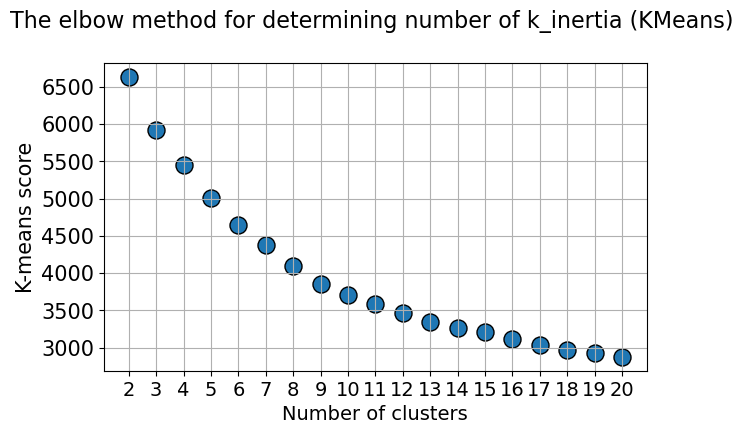

In [339]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of k_inertia (KMeans) \n",fontsize=16)
plt.scatter(x=[i for i in range(2,21)],y=k_inertia,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

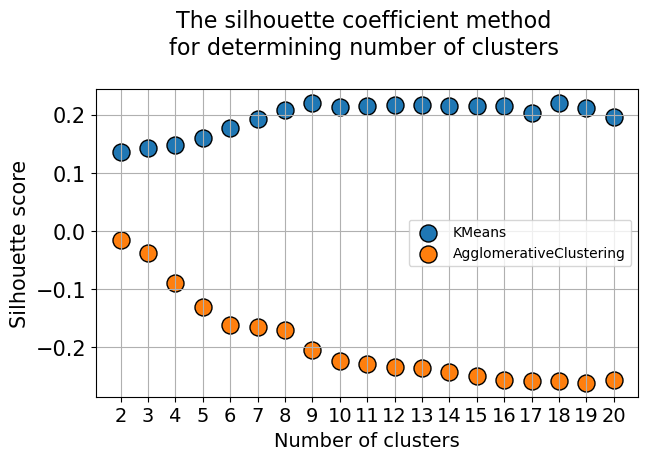

In [340]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters \n",fontsize=16)
plt.scatter(x=[i for i in range(2,21)],y=km_silhouette,s=150,edgecolor='k', label='KMeans')
plt.scatter(x=[i for i in range(2,21)],y=km_silhouette_agg,s=150,edgecolor='k', label='AgglomerativeClustering')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

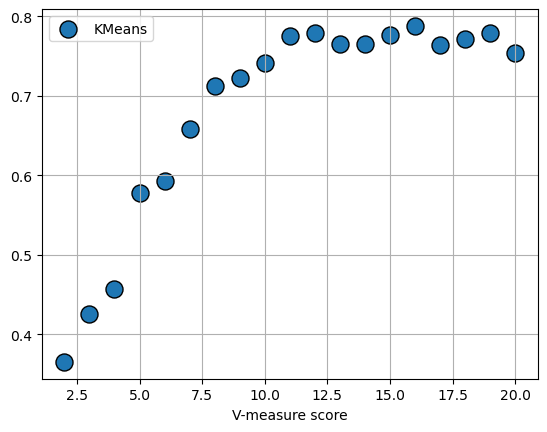

In [341]:
plt.scatter(x=[i for i in range(2,21)],y=vmeasure_score,s=150,edgecolor='k',label='KMeans')
plt.grid(True)
plt.xlabel("V-measure score")
plt.legend()
plt.show()

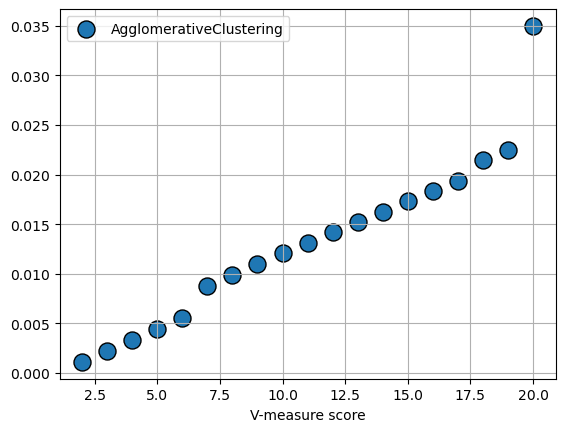

In [342]:
plt.scatter(x=[i for i in range(2,21)],y=vmeasure_score_agg,s=150,edgecolor='k',label='AgglomerativeClustering')
plt.grid(True)
plt.xlabel("V-measure score")
plt.legend()
plt.show()

Для TruncatedSVD увеличение количества компонент значительного улучшения результата не дало. 
(Пробовал на 5 и 10 компонент - там плюс минус такая же картина)

In [343]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42,n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

C:\Users\HP\anaconda3\envs\My\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\envs\My\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 0, 't-SNE признак 1')

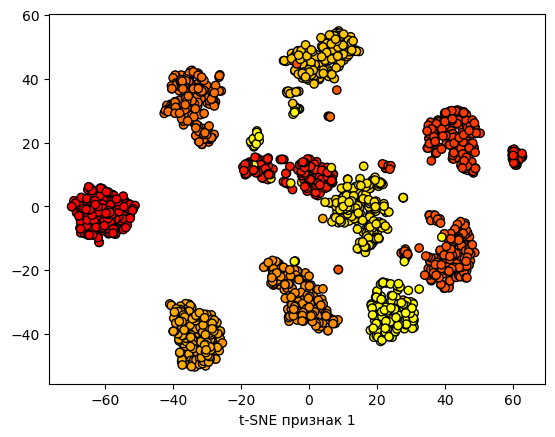

In [344]:
plt.autumn()
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=Y,edgecolor='k');
plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1")

In [345]:
km_scores= []
k_inertia = []
km_silhouette = []
vmeasure_score =[]

km_silhouette_agg = []
vmeasure_score_agg =[]
for i in range(2,21):
    km = KMeans(n_clusters=i, random_state=0).fit(X_tsne)
    preds = km.predict(X_tsne)
    
    agg = AgglomerativeClustering(n_clusters=i,linkage='single')
    y_pred = agg.fit_predict(X_tsne)

    k_inertia.append(km.inertia_)
    print("Score for number of cluster(s) KMeans {}: {}".format(i,km.score(X_tsne)))
    km_scores.append(-km.score(X_tsne))
    
    silhouette = silhouette_score(X_tsne,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) KMeans {}: {}".format(i,silhouette))
    
    v_measure = v_measure_score(Y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) KMeans {}: {}".format(i,v_measure))
    print("-"*100)
    
    silhouette_agg = silhouette_score(X_tsne,y_pred)
    km_silhouette_agg.append(silhouette_agg)
    print("Silhouette score for number of cluster(s) AgglomerativeClustering {}: {}".format(i,silhouette))
    
    v_measure_agg = v_measure_score(Y,y_pred)
    vmeasure_score_agg.append(v_measure_agg)
    print("V-measure score for number of cluster(s) AgglomerativeClustering {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) KMeans 2: -1951629.875
Silhouette score for number of cluster(s) KMeans 2: 0.3840855062007904
V-measure score for number of cluster(s) KMeans 2: 0.3269589178062382
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) AgglomerativeClustering 2: 0.3840855062007904
V-measure score for number of cluster(s) AgglomerativeClustering 2: 0.3269589178062382
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) KMeans 3: -1161066.75
Silhouette score for number of cluster(s) KMeans 3: 0.4411298632621765
V-measure score for number of cluster(s) KMeans 3: 0.5187039303188405
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) AgglomerativeClustering 3: 0.4411298632621765
V-measure score for number of cluster(s) Aggl

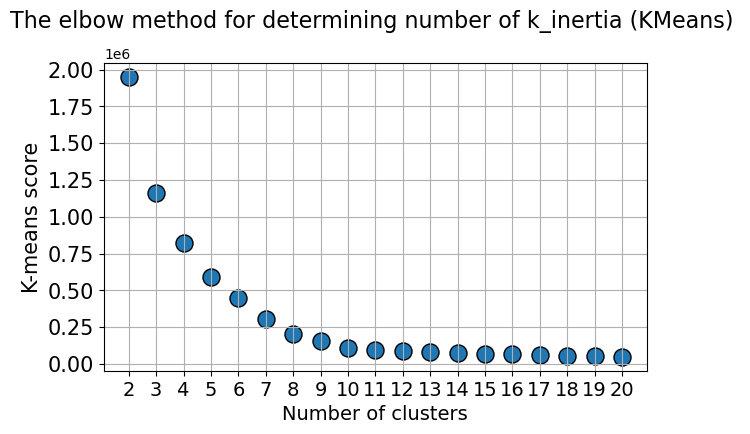

In [346]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of k_inertia (KMeans) \n",fontsize=16)
plt.scatter(x=[i for i in range(2,21)],y=k_inertia,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

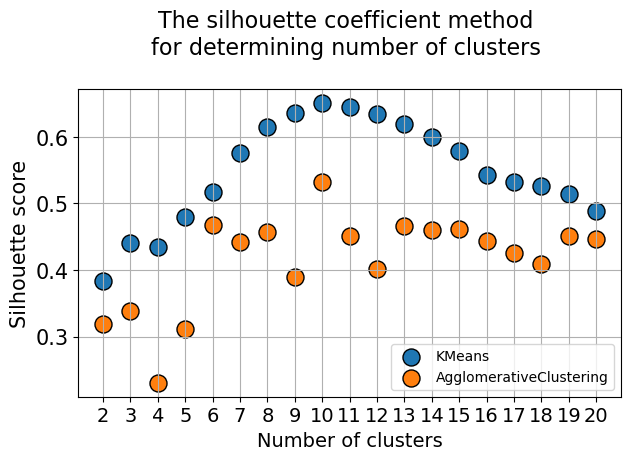

In [347]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters \n",fontsize=16)
plt.scatter(x=[i for i in range(2,21)],y=km_silhouette,s=150,edgecolor='k', label='KMeans')
plt.scatter(x=[i for i in range(2,21)],y=km_silhouette_agg,s=150,edgecolor='k', label='AgglomerativeClustering')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

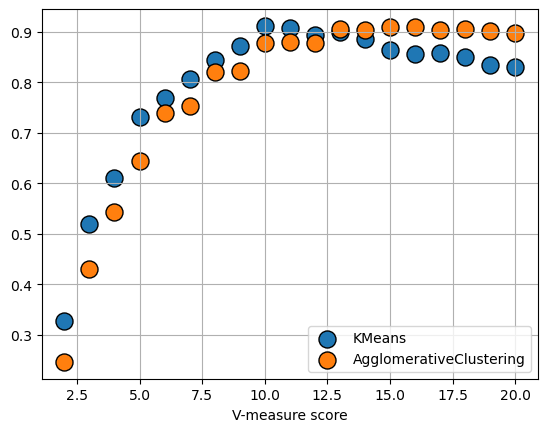

In [348]:
plt.scatter(x=[i for i in range(2,21)],y=vmeasure_score,s=150,edgecolor='k', label='KMeans')
plt.scatter(x=[i for i in range(2,21)],y=vmeasure_score_agg,s=150,edgecolor='k',label='AgglomerativeClustering')
plt.grid(True)
plt.xlabel("V-measure score")
plt.legend()
plt.show()

Визуализируем центры кластеров для tsne

In [349]:
kmeans = KMeans(n_clusters=10)
y_kmeans=kmeans.fit_predict(X_tsne)


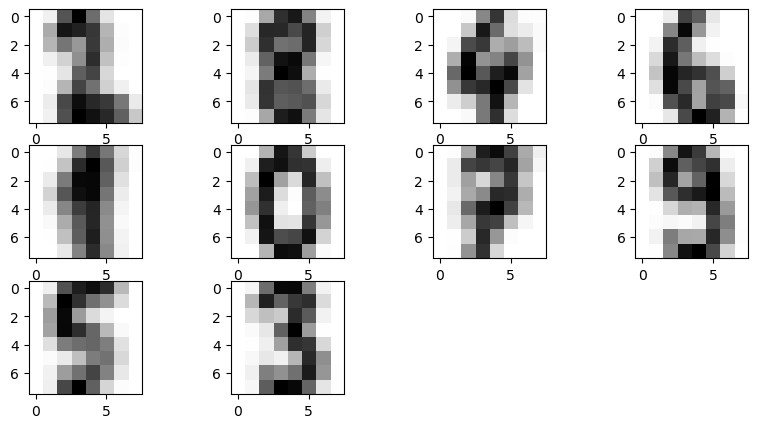

In [351]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(np.mean(X[y_kmeans==i],axis=0).reshape(8,8), cmap=plt.cm.binary)

# Выводы

Основываясь только на полученных результатах центров кластеров могу предположить, что к средних более лучше дает осмысленные кластеры и метрики, чем иерархическая модель)). Снижение признаков явно дает улучшение, по крайне мере tsne прекрасно справился по двум параметрам раскучковать. TruncatedSVD как то хуже справляется. Нужно играться с метриками и параметрами чтобы как то кластеризовать, нет какого то одного способа/критерия определить железно количество кластеров